# $$分析模型预测值与真实值的差异原因$$

# 1. 导入依赖库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 2. 读取数据 （模型预测数据 y_pred_df 和真实数据 y_df）

In [2]:
y_pred_df = pd.read_csv('y_test_pred.csv', names=['pred_exp', 'pred_static', 'pred_greedy'], skiprows=[0])
y_pred_df_same_names = pd.read_csv('y_test_pred.csv', names=['exp', 'static', 'greedy'], skiprows=[0])
y_df = pd.read_csv('y_test.csv', names=['exp', 'static', 'grady'], skiprows=[0])

## 读取所有原始数据

In [3]:
# 所有数据
data_df = pd.read_csv('data/Features.csv')
data_df.head()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
0,4.19,1,1386,1821,16454,901.873155,943.341039,879.878944,802.674362,0.089257,...,0.475829,999.074209,955.166635,997.787702,986.738929,13,6,-1,0,-1
1,4.19,1,529,1199,14062,905.320230,650.077643,650.077643,650.077643,0.053294,...,0.550532,667.675168,585.119637,655.264699,585.119637,2,2,1,1,-1
2,4.19,1,716,990,13779,787.775655,864.166706,925.812156,767.183548,0.080272,...,0.756983,612.851744,601.668111,975.484821,700.256755,14,7,-1,-1,0
3,4.19,1,547,1456,14027,625.313098,683.213117,670.375942,623.874198,0.063568,...,0.512717,670.883400,641.749020,670.883400,641.749020,14,7,-1,-1,0
4,4.19,1,914,1073,14355,604.748398,618.476141,620.277530,595.945774,0.047176,...,0.289439,590.331899,590.331899,657.448103,611.118098,14,7,-1,-1,0


In [4]:
data_Y_df = pd.DataFrame(data_df, columns=['expPerf ', 'staticPerf ' ,'grdyPerf '])

In [5]:
data_Y_df.describe()

,expPerf,staticPerf,grdyPerf
count,101919.000000,101919.000000,101919.000000
mean,1093.600053,1131.536911,1111.267396
std,538.182111,560.413001,556.217881
min,29.164769,29.164769,29.164769
25%,694.736875,715.081870,698.822865
50%,1033.289522,1069.586010,1046.311103
75%,1428.164356,1482.949322,1456.347116
max,4297.220375,4197.507054,4942.727953


# 3. 查看数据前 5 行

In [6]:
y_pred_df.head()

,pred_exp,pred_static,pred_greedy
0,1241.5509,1319.93740,1269.03230
1,599.5573,611.12006,606.10046
2,452.7318,468.24078,450.97610
3,2161.0093,2287.12960,2153.53370
4,321.1740,322.89300,322.23697


In [7]:
y_df.head()

,exp,static,grady
0,1162.102453,1230.058085,1130.901853
1,584.219413,584.219413,671.797495
2,460.861027,491.643111,475.060521
3,2013.833367,2107.497762,1968.842429
4,418.439601,418.439601,424.092712


# 4. 查看前 100 个数据的图形

Text(0.5,0,'样本序号')

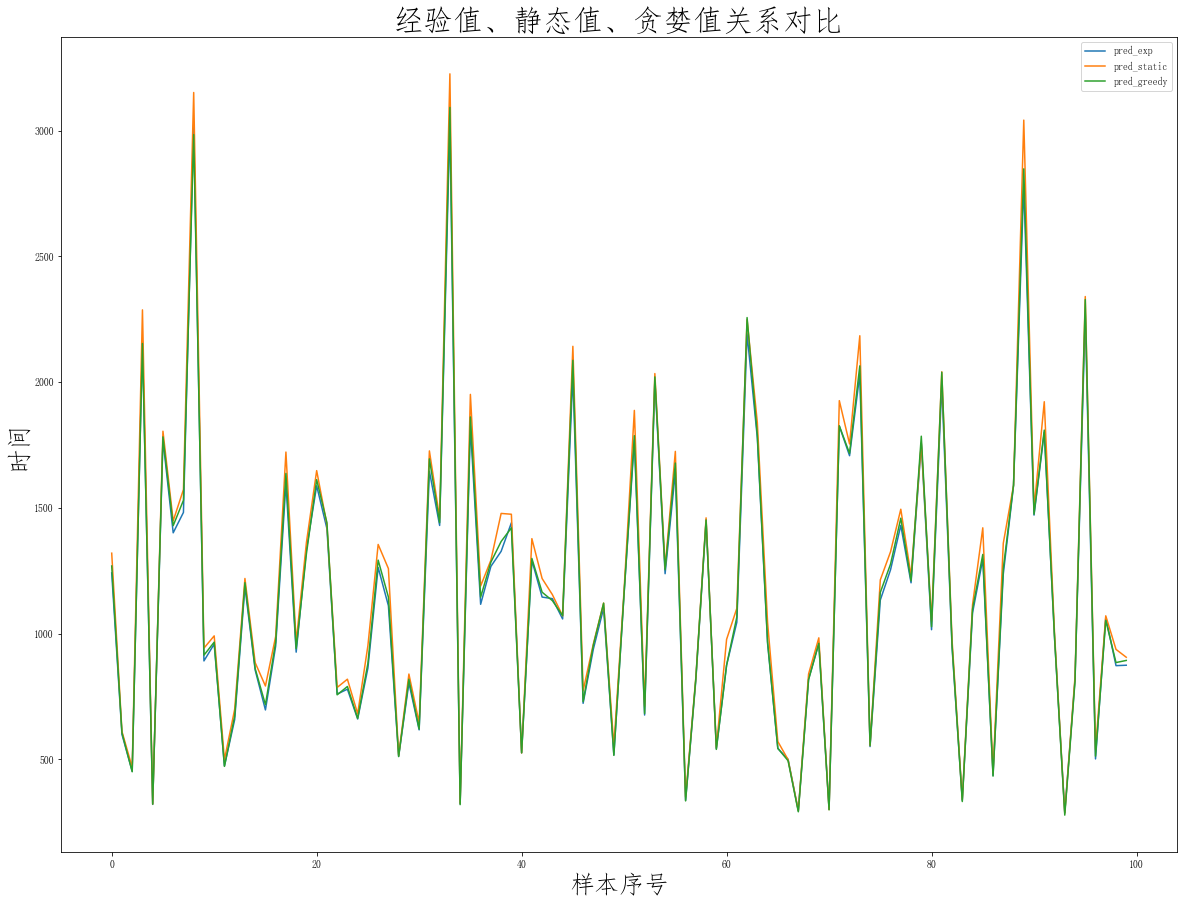

In [8]:
y_pred_df[:100].plot(figsize=(20, 15))
plt.title('经验值、静态值、贪婪值关系对比', fontsize=30)
plt.ylabel('时间', fontsize=25)
plt.xlabel('样本序号', fontsize=25)

Text(0.5,0,'样本序号')

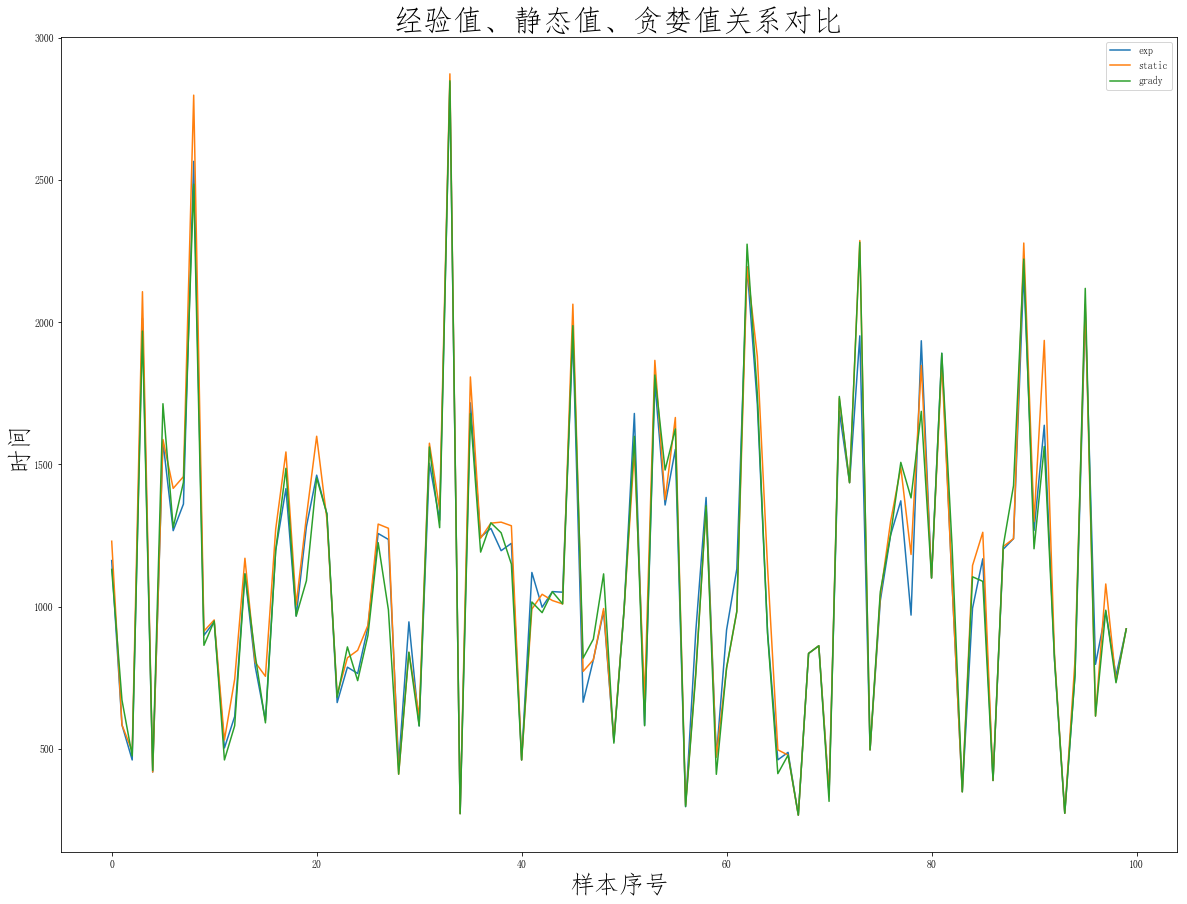

In [9]:
y_df[:100].plot(figsize=(20, 15))
plt.title('经验值、静态值、贪婪值关系对比', fontsize=30)
plt.ylabel('时间', fontsize=25)
plt.xlabel('样本序号', fontsize=25)

# 5. 查看数据统计信息（数量、均值、方差、极值、四分位数）

In [10]:
y_pred_df.describe()

,pred_exp,pred_static,pred_greedy
count,20384.000000,20384.000000,20384.000000
mean,1147.829838,1198.153961,1161.516584
std,566.000792,594.103295,575.297491
min,67.855515,70.143740,66.435100
25%,721.955565,749.545575,727.866225
50%,1085.210700,1133.225300,1097.666100
75%,1505.993450,1579.158850,1526.766875
max,3770.651900,3889.056200,3741.518000


In [11]:
y_df.describe()

,exp,static,grady
count,20384.000000,20384.000000,20384.000000
mean,1091.242285,1129.530218,1108.239560
std,534.191970,557.782875,552.681512
min,54.510742,54.510742,54.510742
25%,692.003770,710.809876,694.841624
50%,1031.266727,1065.827417,1042.856347
75%,1428.886976,1484.104924,1454.185639
max,3777.686825,3865.536072,4112.935550


# 6. 预测值与真实值的相关系数（用来度量两个变量间的线性关系）

In [12]:
y_pred_df_same_names.corrwith(y_df)

exp       0.975056
grady          NaN
greedy         NaN
static    0.978648
dtype: float64

---

# 7. 画图分析 【红色点代表经验值、绿色点代表静态值、蓝色点代表贪婪值】

## 针对预测数据

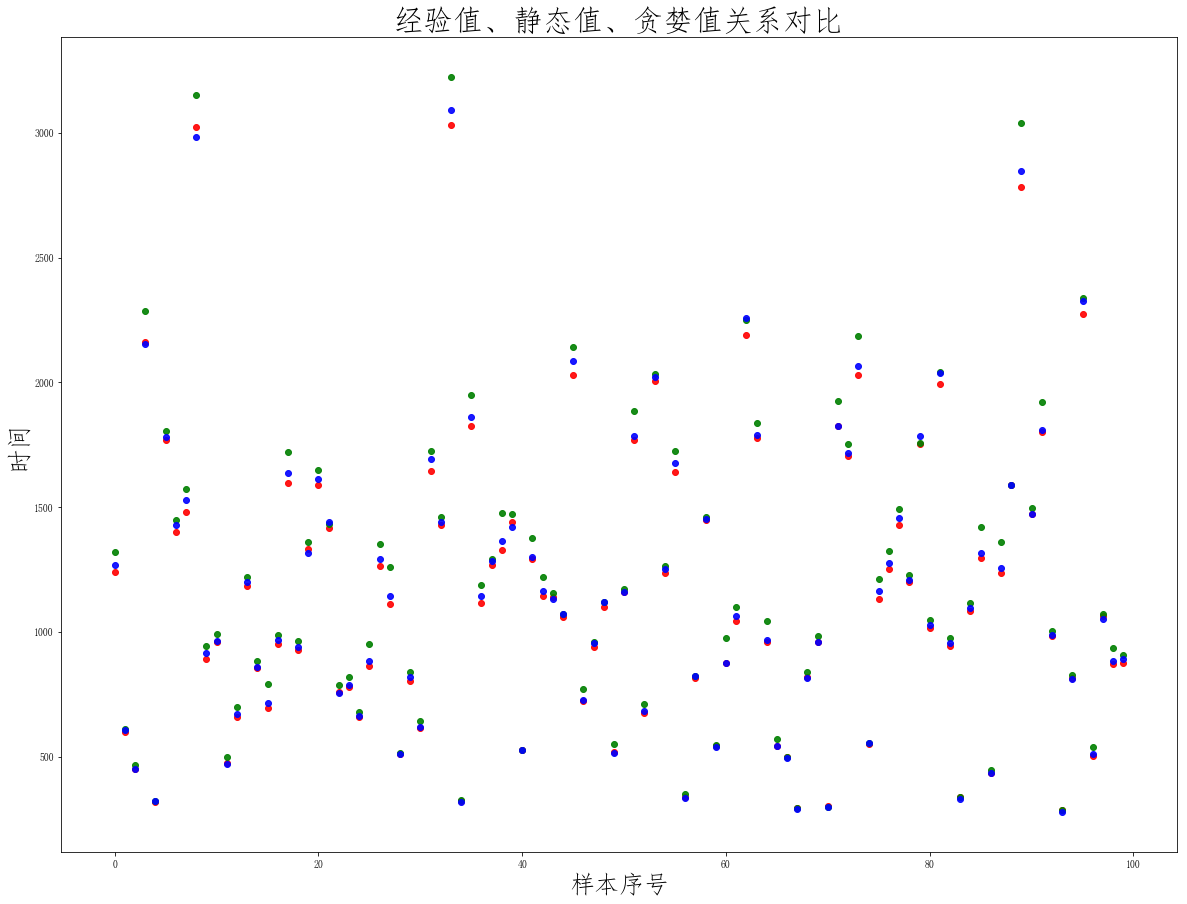

In [14]:
plt.figure(figsize=(20, 15))
plt.scatter(y_pred_df.index[:100], y_pred_df['pred_exp'][:100], color='r', alpha=0.9, label='pred_exp')
plt.scatter(y_pred_df.index[:100], y_pred_df['pred_static'][:100], color='g', alpha=0.9, label='pred_static')
plt.scatter(y_pred_df.index[:100], y_pred_df['pred_greedy'][:100], color='b', alpha=0.9, label='pred_grady')
plt.title('经验值、静态值、贪婪值关系对比', fontsize=30)
plt.ylabel('时间', fontsize=25)
plt.xlabel('样本序号', fontsize=25)
plt.show()

## 针对真实数据

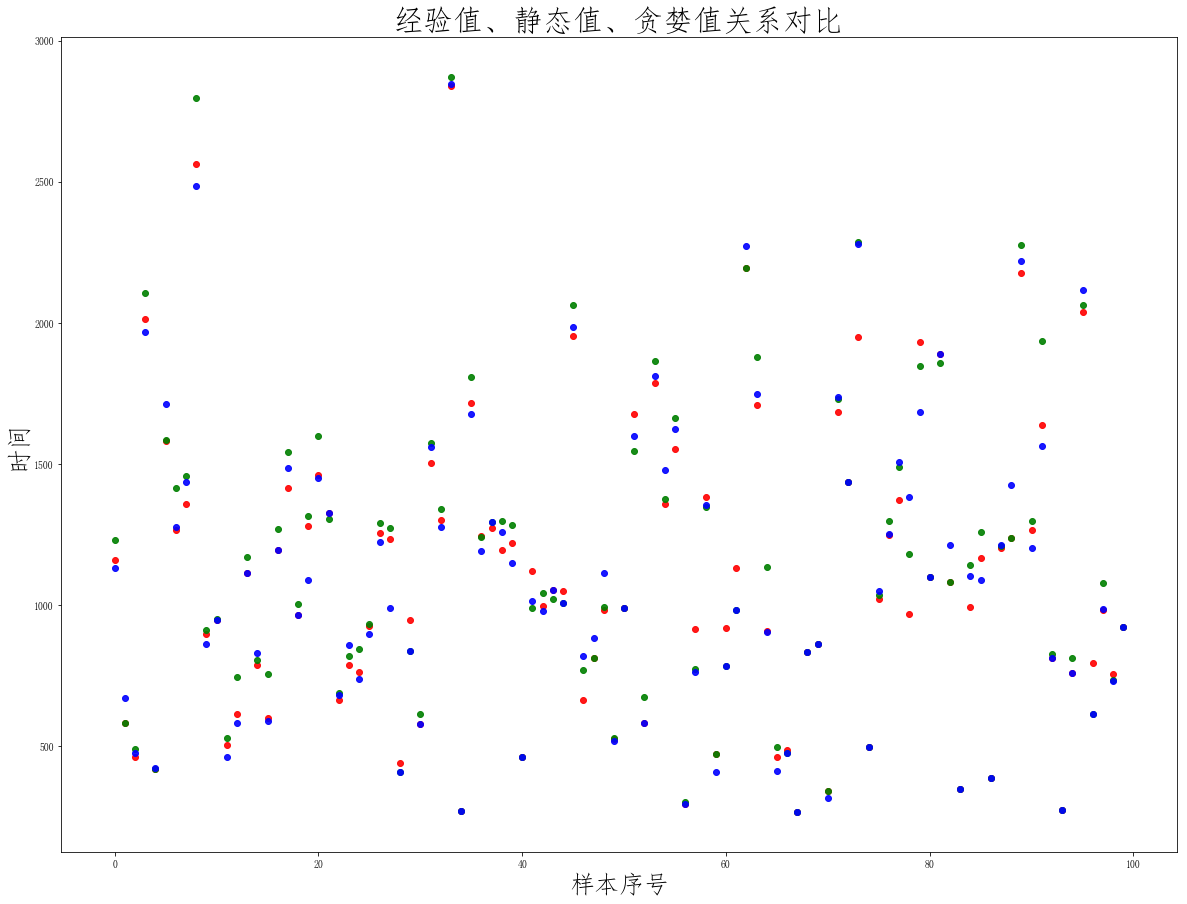

In [16]:
plt.figure(figsize=(20, 15))
plt.scatter(y_df.index[:100], y_df['exp'][:100], color='r', alpha=0.9)
plt.scatter(y_df.index[:100], y_df['static'][:100], color='g', alpha=0.9)
plt.scatter(y_df.index[:100], y_df['grady'][:100], color='b', alpha=0.9)
plt.title('经验值、静态值、贪婪值关系对比', fontsize=30)
plt.ylabel('时间', fontsize=25)
plt.xlabel('样本序号', fontsize=25)
plt.show()

## **结论：  经验值、静态值、贪婪值 三者相距普遍很近（有时还会有重叠），需要很高的模型精度才能将它们分开（重叠时不可能分开）。不如在这三者相距很近时，按照统计规律直接选择经验路径（后文有实验分析）。**

# 8. 统计选择 经验值、静态值、贪婪值 的比例

In [17]:
read_row_num = 0

count_exp_min = 0
count_static_min = 0
count_grady_min = 0

for i, row in data_Y_df.iterrows():
    exp, static, grady = row[0], row[1], row[2]
    #print(exp, static, grady)
    
    A,B,C = exp, static, grady
    
    if (A<=B and B<=C) or (A<=C and C<=B):
        count_exp_min += 1
    elif (B<=A and A<=C) or (B<=C and C<=A):
        count_static_min += 1
    elif (C<=A and A<=B) or (C<=B and B<=A):
        count_grady_min += 1
    else:
        print('???')
        
    # 控制行数
    read_row_num+=1
    #if read_row_num==10:
    #    break
    
print('select exp', count_exp_min / read_row_num)
print('select static', count_static_min / read_row_num)
print('select grady', count_grady_min / read_row_num)

select exp 0.5523307724761821
select static 0.1626978286678637
select grady 0.28497139885595424


([<matplotlib.patches.Wedge at 0xbfc64a8>,
 [Text(-1.18382,-0.196395,'经验值'),
  Text(0.819059,-0.734263,'静态值'),
  Text(0.858412,0.687844,'贪婪值')],
 [Text(-0.690561,-0.114564,'55.2 %'),
  Text(0.44676,-0.400507,'16.3 %'),
  Text(0.468225,0.375188,'28.5 %')])

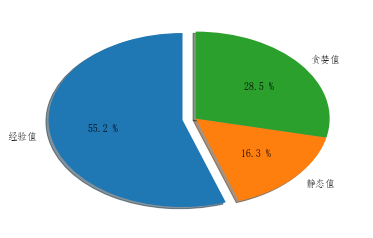

In [18]:
labels = '经验值', '静态值', '贪婪值'
fracs = [count_exp_min / read_row_num, count_static_min / read_row_num, count_grady_min / read_row_num]
explode = [0.1, 0, 0]
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)

## **结论： 经验值 ：静态值 ：贪婪值 =0.552 : 0.163 : 0.285**

----

# 9. 定量分析模型预测值与真实值关系，找到“最佳”逼近真实值的方法

In [19]:
y_and_pred_y = pd.concat([y_df, y_pred_df], axis=1)

## 原始模型正确率

In [20]:
n_row = 0
true_selsect_num = 0
for i, row in y_and_pred_y.iterrows():
    A, B, C, pA, pB, pC = row[0], row[1], row[2], row[3], row[4], row[5]
    
    if (A<=B and B<=C) or (A<=C and C<=B):
        select = 0
    elif (B<=A and A<=C) or (B<=C and C<=A):
        select = 1
    elif (C<=A and A<=B) or (C<=B and B<=A):
        select = 2
    else:
        print('???')
    
    if (pA<=pB and pB<=pC) or (pA<=pC and pC<=pB):
        pselect = 0
    elif (pB<=pA and pA<=pC) or (pB<=pC and pC<=pA):
        pselect = 1
    elif (pC<=pA and pA<=pB) or (pC<=pB and pB<=pA):
        pselect = 2
    else:
        print('???')
        
    if select==pselect:
        true_selsect_num +=1
    
    n_row += 1
    #if n_row==10000:
    #    break
        
print('原始模型的正确率是：', true_selsect_num / n_row)

原始模型的正确率是： 0.49072802197802196


## 增加阈值

|路径用时最大值 – 路径用时最小值|  / 路径用时最小值 <=阈值

In [21]:
thresholds = np.arange(0.0, 0.11, 0.01)
print(thresholds)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


In [22]:
# 查看不同阈值时，占样本总数的比率
n_row = 0
include_threshold_num = 0

for threshold in thresholds:
    for i, row in y_and_pred_y.iterrows():
        threshold_flag = False
        A, B, C, pA, pB, pC = row[0], row[1], row[2], row[3], row[4], row[5]

        if (A<=B and B<=C) or (A<=C and C<=B):
            select = 0
        elif (B<=A and A<=C) or (B<=C and C<=A):
            select = 1
        elif (C<=A and A<=B) or (C<=B and B<=A):
            select = 2
        else:
            print('???')

        true_max = max(A, B, C)
        true_min = min(A, B, C)

        if ((true_max - true_min) / true_min) <= threshold:
            include_threshold_num += 1
        
        n_row += 1
        
    print('当阈值是：{}时，占比样本数量是：{}'.format(threshold, include_threshold_num / n_row) )

当阈值是：0.0时，占比样本数量是：0.10120682888540031
当阈值是：0.01时，占比样本数量是：0.12713402668759813
当阈值是：0.02时，占比样本数量是：0.1553342490842491
当阈值是：0.03时，占比样本数量是：0.18536597331240187
当阈值是：0.04时，占比样本数量是：0.21577708006279434
当阈值是：0.05时，占比样本数量是：0.2457891810570382
当阈值是：0.06时，占比样本数量是：0.27476031621439784
当阈值是：0.07时，占比样本数量是：0.3026209281789639
当阈值是：0.08时，占比样本数量是：0.3296594278737136
当阈值是：0.09时，占比样本数量是：0.3559164050235479
当阈值是：0.1时，占比样本数量是：0.38084683173968886


## 方式一：设定阈值，且认为小于阈值时，模型做任何判断都正确

In [23]:
n_row = 0
true_selsect_num = 0

for threshold in thresholds:
    for i, row in y_and_pred_y.iterrows():
        threshold_flag = False
        A, B, C, pA, pB, pC = row[0], row[1], row[2], row[3], row[4], row[5]

        if (A<=B and B<=C) or (A<=C and C<=B):
            select = 0
        elif (B<=A and A<=C) or (B<=C and C<=A):
            select = 1
        elif (C<=A and A<=B) or (C<=B and B<=A):
            select = 2
        else:
            print('???')

        true_max = max(A, B, C)
        true_min = min(A, B, C)

        if ((true_max - true_min) / true_min) <= threshold:
            threshold_flag=True

        if (pA<=pB and pB<=pC) or (pA<=pC and pC<=pB):
            pselect = 0
        elif (pB<=pA and pA<=pC) or (pB<=pC and pC<=pA):
            pselect = 1
        elif (pC<=pA and pA<=pB) or (pC<=pB and pB<=pA):
            pselect = 2
        else:
            print('???')

        if select==pselect or threshold_flag:
            true_selsect_num +=1

        n_row += 1
        #if n_row==10:
        #    break

    print('当阈值是：{}时，模型的正确率是：{}'.format(threshold, true_selsect_num / n_row) )

当阈值是：0.0时，模型的正确率是：0.5344387755102041
当阈值是：0.01时，模型的正确率是：0.5498920722135008
当阈值是：0.02时，模型的正确率是：0.5664246467817896
当阈值是：0.03时，模型的正确率是：0.5839383830455259
当阈值是：0.04时，模型的正确率是：0.6014423076923077
当阈值是：0.05时，模型的正确率是：0.6185570381998954
当阈值是：0.06时，模型的正确率是：0.6348676833370711
当阈值是：0.07时，模型的正确率是：0.6503201040031397
当阈值是：0.08时，模型的正确率是：0.6653039420896564
当阈值是：0.09时，模型的正确率是：0.6797439167974882
当阈值是：0.1时，模型的正确率是：0.6932710146995861


## 方式二：根据统计结果，改进模型方法（当小于阈值时，直接选择计算代价最小且可能性最大的经验路径）

In [24]:
thresholds2 = np.arange(0.65, 0.81, 0.01)
print(thresholds2)

[0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81]


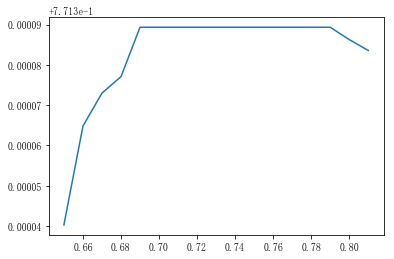

In [25]:
n_row = 0
true_selsect_num = 0
model_accuracy_list = []
for threshold in thresholds2:
    for i, row in y_and_pred_y.iterrows():
        A, B, C, pA, pB, pC = row[0], row[1], row[2], row[3], row[4], row[5]

        if (A<=B and B<=C) or (A<=C and C<=B):
            select = 0
        elif (B<=A and A<=C) or (B<=C and C<=A):
            select = 1
        elif (C<=A and A<=B) or (C<=B and B<=A):
            select = 2
        else:
            print('???')

        true_max = max(A, B, C)
        true_min = min(A, B, C)

        if ((true_max - true_min) / true_min) <= threshold:
            
            select = 0

        if (pA<=pB and pB<=pC) or (pA<=pC and pC<=pB):
            pselect = 0
        elif (pB<=pA and pA<=pC) or (pB<=pC and pC<=pA):
            pselect = 1
        elif (pC<=pA and pA<=pB) or (pC<=pB and pB<=pA):
            pselect = 2
        else:
            print('???')

        if select==pselect:
            true_selsect_num +=1
        n_row += 1
        #if n_row==10:
        #    break
        
    model_accuracy_list.append(true_selsect_num / n_row)
    
    #print('当阈值是：{}时，模型的正确率是：{}'.format(threshold, true_selsect_num / n_row))
plt.plot(thresholds2, model_accuracy_list)

In [26]:
max_model_accuracy = max(model_accuracy_list)
max_model_accuracy_index = model_accuracy_list.index(max_model_accuracy)
max_model_accuracy_threshold = thresholds2[max_model_accuracy_index]
print("模型最佳准确率是：{}，对应的阈值是：{}".format(max_model_accuracy, max_model_accuracy_threshold))

模型最佳准确率是：0.7713893249607535，对应的阈值是：0.6900000000000001


# **全文总结**

+ 阈值定义：|路径用时最大值 – 路径用时最小值|  / 路径用时最小值 <= 阈值
+ 准确率计算标准：模型选择的用时最小的路径与真实用时最小路径进行对比，相同时认为准确。当不同路径用时相同时，选择方法是经验的路优于静态的路优于贪婪的路。
+ 基准模型：没有对数据进行特殊处理 + 普通前馈神经网络

|方法|准确率|附加说明|
|-|-|-|
|直接根据统计规律|55%|没有任何计算代价，直接选择经验路径|
|直接使用基准模型预测|49%|模型对于比较接近的值，预测效果如同乱猜，效果差|
|使用基准模型 + 设定阈值|69%|当阈值设置为 0.1 时，模型准确率为 69%，继续增大阈值显然可以增加预测准确率，但是显然没有太大意义|
|使用基准模型 + 统计规律|77%|当模型预测的数值比较接近时（基准模型最佳阈值是0.69），使用统计规律；当模型预测数值比较分散时，使用模型选择的最佳值|
|使用更优模型 + 统计规律|？||